#### Dependencies

In [1]:
import os
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from tqdm import tqdm

#### Create output directory for everything we will do here

In [2]:
str_dirname_output = './output'

try:
    os.mkdir(str_dirname_output)
except:
    pass

# Import data

In [3]:
# import train and valid and get list of cols
df_train = pd.read_csv('./input/train.csv')
df_valid = pd.read_csv('./input/test.csv')

# get columns list
list_cols = list(df_train.columns)
list_cols_notarget = list(df_valid.columns)
list_cols

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [4]:
# get cols numeric and cols non-numeric
list_cols_numeric = df_train.select_dtypes(include=['number']).columns.tolist()
list_cols_nonnumeric = df_train.select_dtypes(exclude=['number']).columns.tolist()

In [5]:
list_cols_numeric

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [6]:
list_cols_nonnumeric

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'APP_DATE']

In [7]:
# get shape
print(df_train.shape)
print(df_valid.shape)

(125000, 123)
(48744, 122)


# Exploratory Data Analysis

#### Get general data info

In [8]:
# get mean target
flt_mean_target =  np.mean(df_train['TARGET'])

# get date min/max for train
train_date_min =  str(np.min(df_train['APP_DATE']))
train_date_max =  str(np.max(df_train['APP_DATE']))

# get date min/max for valid
valid_date_min =  str(np.min(df_valid['APP_DATE']))
valid_date_max =  str(np.max(df_valid['APP_DATE']))

# get prop missing
prop_missing_train = (np.sum(df_train.isnull().sum())) / (df_train.size)
prop_missing_valid = (np.sum(df_valid.isnull().sum())) / (df_valid.size)


dict_info = {
    'target_mean': flt_mean_target,
    'min_train_date': train_date_min,
    'max_train_date': train_date_max,
    'min_valid_date': valid_date_min, 
    'max_valid_date': valid_date_max,
    'proportion_na_train': prop_missing_train,
    'proportion_na_valid': prop_missing_valid,
}

pprint(dict_info, sort_dicts=False)

{'target_mean': 0.0806,
 'min_train_date': '2016-01-01',
 'max_train_date': '2017-01-01',
 'min_valid_date': '2018-01-01',
 'max_valid_date': '2018-06-01',
 'proportion_na_train': 0.24216767479674797,
 'proportion_na_valid': 0.23703716035332134}


#### Get descriptions by column

In [9]:
# get descriptives for each column
def get_descriptives_by_column(df):
	# get descriptives
	list_dict_row = []
	for col in tqdm (df.columns):
		# save as series
		ser_col = df[col]
		# get proportion nan
		flt_prop_na = ser_col.isnull().mean()
		if flt_prop_na == 1.0:
			# create row
			dict_row = {
				'feature': col,
				'dtype': np.nan,
				'propna': flt_prop_na,
				'min': np.nan,
				'max': np.nan,
				'range': np.nan,
				'std': np.nan,
				'mean': np.nan,
				'median': np.nan,
				'mode': np.nan,
				'n_unique': 0,
				'prop_unique': 0,
				'prop_negative': np.nan,
				'prop_min': np.nan,
				'prop_max': np.nan,
				'prop_zero': np.nan,
			}
			# append
			list_dict_row.append(dict_row)
			# skip the rest of the iteration
			continue
		# get data type
		str_dtype = ser_col.dtype
		# if value
		if str_dtype in ['float64', 'int64']:
			val_min, val_max, val_mean, val_std, val_median = ser_col.min(), ser_col.max(), ser_col.mean(), ser_col.std(), ser_col.median()
			val_range = val_max - val_min
			val_mode, int_n_unique = ser_col.mode().iloc[0], ser_col.nunique()
			flt_prop_unique = int_n_unique / len(ser_col.dropna())
			flt_prop_negative = len(ser_col[ser_col<0]) / len(ser_col.dropna())
			flt_prop_min = len(ser_col[ser_col==val_min]) / len(ser_col.dropna())
			flt_prop_max = len(ser_col[ser_col==val_max]) / len(ser_col.dropna())
			flt_prop_zero = len(ser_col[ser_col==0]) / len(ser_col.dropna())
		# if object
		if str_dtype == 'O':
			val_min, val_max, val_std, val_mean, val_median = np.nan, np.nan, np.nan, np.nan, np.nan
			val_range = np.nan
			val_mode, int_n_unique = ser_col.mode().iloc[0], ser_col.nunique()
			flt_prop_unique = int_n_unique / len(ser_col.dropna())
			flt_prop_negative = np.nan 
			flt_prop_min = np.nan
			flt_prop_max = np.nan
			flt_prop_zero = np.nan
		# if dtm
		if str_dtype == 'datetime64[ns]':
			val_min, val_max, val_mean, val_std, val_median = ser_col.min(), ser_col.max(), ser_col.mean(), np.nan, np.nan
			val_range = val_max - val_min
			val_mode, int_n_unique = ser_col.mode().iloc[0], ser_col.nunique()
			flt_prop_unique = int_n_unique / len(ser_col.dropna())
			flt_prop_negative = np.nan 
			flt_prop_min = len(ser_col[ser_col==val_min]) / len(ser_col.dropna())
			flt_prop_max = len(ser_col[ser_col==val_max]) / len(ser_col.dropna())
			flt_prop_zero = np.nan
		# create row
		dict_row = {
			'feature': col,
			'dtype': str_dtype,
			'propna': flt_prop_na,
			'min': val_min,
			'max': val_max,
			'range': val_range,
			'std': val_std,
			'mean': val_mean,
			'median': val_median,
			'mode': val_mode,
			'n_unique': int_n_unique,
			'prop_unique': flt_prop_unique,
			'prop_negative': flt_prop_negative,
			'prop_min': flt_prop_min,
			'prop_max': flt_prop_max,
			'prop_zero': flt_prop_zero,
		}
		# append
		list_dict_row.append(dict_row)
	# make df
	df_descriptives = pd.DataFrame(list_dict_row)
	# order cols
	df_descriptives.columns = [
		'feature',
		'dtype',
		'propna',
		'min',
		'max',
		'range',
		'std',
		'mean',
		'median',
		'mode',
		'n_unique',
		'prop_unique',
		'prop_negative',
		'prop_min',
		'prop_max',
		'prop_zero',
	]
	df_descriptives.sort_values(by='propna', ascending=False, inplace=True)
	# return
	return df_descriptives

df_train_desc = get_descriptives_by_column(df=df_train)
df_valid_desc = get_descriptives_by_column(df=df_valid)

100%|███████████████████████████████████████████████████████████████████████████████| 122/122 [00:00<00:00, 341.84it/s]


In [10]:
df_train_desc

,feature,dtype,propna,min,max,range,std,mean,median,mode,n_unique,prop_unique,prop_negative,prop_min,prop_max,prop_zero
48,COMMONAREA_AVG,float64,0.699624,0.0,1.0,1.0,0.076619,0.044599,0.0210,0.0,2621,0.069806,0.0,0.090926,0.001039,0.090926
76,COMMONAREA_MEDI,float64,0.699624,0.0,1.0,1.0,0.076981,0.044630,0.0208,0.0,2632,0.070099,0.0,0.093536,0.001039,0.093536
62,COMMONAREA_MODE,float64,0.699624,0.0,1.0,1.0,0.075316,0.042559,0.0190,0.0,2559,0.068155,0.0,0.104562,0.001039,0.104562
84,NONLIVINGAPARTMENTS_MEDI,float64,0.695400,0.0,1.0,1.0,0.045099,0.008315,0.0000,0.0,163,0.004281,0.0,0.600236,0.000840,0.600236
56,NONLIVINGAPARTMENTS_AVG,float64,0.695400,0.0,1.0,1.0,0.045384,0.008457,0.0000,0.0,296,0.007774,0.0,0.583926,0.000840,0.583926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,CNT_FAM_MEMBERS,int64,0.000000,1.0,20.0,19.0,0.910911,2.151024,2.0000,2,13,0.000104,0.0,0.220936,0.000008,0.000000
27,FLAG_EMAIL,int64,0.000000,0.0,1.0,1.0,0.230293,0.056192,0.0000,0,2,0.000016,0.0,0.943808,0.056192,0.943808
26,FLAG_PHONE,int64,0.000000,0.0,1.0,1.0,0.450029,0.282112,0.0000,0,2,0.000016,0.0,0.717888,0.282112,0.717888
25,FLAG_CONT_MOBILE,int64,0.000000,0.0,1.0,1.0,0.043226,0.998128,1.0000,1,2,0.000016,0.0,0.001872,0.998128,0.001872


In [11]:
df_valid_desc

,feature,dtype,propna,min,max,range,std,mean,median,mode,n_unique,prop_unique,prop_negative,prop_min,prop_max,prop_zero
61,COMMONAREA_MODE,float64,0.687161,0.0,1.0,1.0,0.081169,0.045223,0.0203,0.0,2001,0.131222,0.0,0.105187,0.001246,0.105187
47,COMMONAREA_AVG,float64,0.687161,0.0,1.0,1.0,0.082868,0.047624,0.0227,0.0,2042,0.133910,0.0,0.090039,0.001312,0.090039
75,COMMONAREA_MEDI,float64,0.687161,0.0,1.0,1.0,0.082892,0.047420,0.0223,0.0,2034,0.133386,0.0,0.093449,0.001246,0.093449
83,NONLIVINGAPARTMENTS_MEDI,float64,0.684125,0.0,1.0,1.0,0.048148,0.008979,0.0000,0.0,134,0.008703,0.0,0.592128,0.000844,0.592128
69,NONLIVINGAPARTMENTS_MODE,float64,0.684125,0.0,1.0,1.0,0.046657,0.008358,0.0000,0.0,106,0.006884,0.0,0.625966,0.000779,0.625966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,CNT_FAM_MEMBERS,int64,0.000000,1.0,21.0,20.0,0.890423,2.146767,2.0000,2,12,0.000246,0.0,0.210303,0.000021,0.000000
26,FLAG_EMAIL,int64,0.000000,0.0,1.0,1.0,0.369046,0.162646,0.0000,0,2,0.000041,0.0,0.837354,0.162646,0.837354
25,FLAG_PHONE,int64,0.000000,0.0,1.0,1.0,0.440337,0.263130,0.0000,0,2,0.000041,0.0,0.736870,0.263130,0.736870
24,FLAG_CONT_MOBILE,int64,0.000000,0.0,1.0,1.0,0.039971,0.998400,1.0000,1,2,0.000041,0.0,0.001600,0.998400,0.001600


#### Get nan info

In [12]:
# get nan analysis for columns
def get_prop_nan(df):
    dict_nans = {}
    # get number of rows
    int_n_rows = len(df)
    # iter through the columns in df
    for col in df.columns:
        # count # of nanas
        nan_count = df[col].isna().sum()
        # get prop
        nan_proportion = nan_count / int_n_rows
        # get col name
        dict_nans[col] = nan_proportion
    # # show
    # pprint(dict_nans)
    # return
    return dict_nans

# get nan analysis for columns in train
dict_nans_train = get_prop_nan(df=df_train[list_cols_notarget])
# get nan analysis for columns in valid
dict_nans_valid = get_prop_nan(df=df_valid[list_cols_notarget])

# combine into df to compare nans
nan_sers_train = pd.Series(dict_nans_train, name='train_nans')
nan_sers_valid = pd.Series(dict_nans_valid, name='valid_nans')
df_prop_nans = pd.concat([nan_sers_train, nan_sers_valid], axis=1).reset_index()
df_prop_nans.columns = ['feature', 'train_nans', 'valid_nans']

# check features diff
df_prop_nans['diff'] = abs(df_prop_nans['train_nans'] - df_prop_nans['valid_nans'])
df_prop_nans.sort_values(by='diff', ascending=False)

,feature,train_nans,valid_nans,diff
40,EXT_SOURCE_1,0.563824,0.421221,0.142603
6,AMT_INCOME_TOTAL,0.000000,0.106393,0.106393
42,EXT_SOURCE_3,0.198816,0.177827,0.020989
49,ENTRANCES_AVG,0.503504,0.483731,0.019773
77,ENTRANCES_MEDI,0.503504,0.483731,0.019773
...,...,...,...,...
35,LIVE_REGION_NOT_WORK_REGION,0.000000,0.000000,0.000000
36,REG_CITY_NOT_LIVE_CITY,0.000000,0.000000,0.000000
37,REG_CITY_NOT_WORK_CITY,0.000000,0.000000,0.000000
38,LIVE_CITY_NOT_WORK_CITY,0.000000,0.000000,0.000000


In [13]:
# get cols where missing in valid but not train
list_missing_val = df_prop_nans[(df_prop_nans['train_nans'] == 0) & (df_prop_nans['valid_nans'] != 0)]['feature'].tolist()

# get cols missin in train but not valid
list_missing_train = df_prop_nans[(df_prop_nans['train_nans'] != 0) & (df_prop_nans['valid_nans'] == 0)]['feature'].tolist()

# show
list_missing_train,list_missing_val

(['AMT_GOODS_PRICE'], ['AMT_INCOME_TOTAL'])

#### Get target info

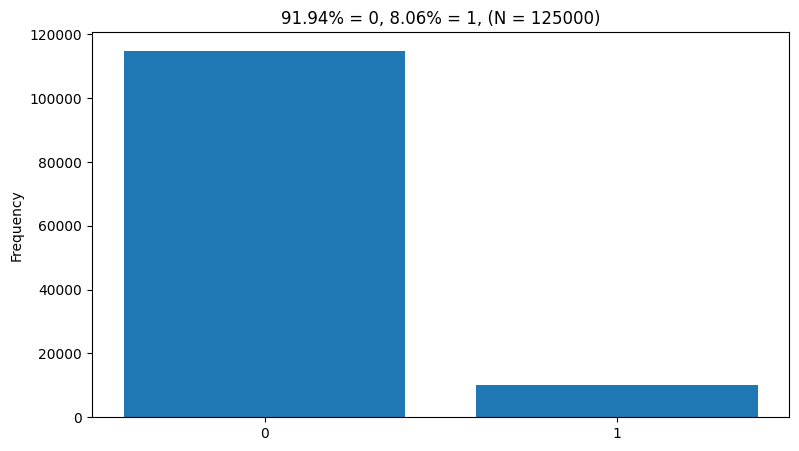

In [14]:
# plot target -- HIGH TARGET IMBALANCE!!!
def plot_target(ser_target):
	# get the total positive
	int_tot_pos = np.sum(ser_target)
	# get total
	int_total = len(ser_target)
	# get the toeal negative
	int_tot_neg = int_total - int_tot_pos
	# get pct negative class
	flt_pct_negative = (int_tot_neg / int_total) * 100
	# get pct positive class
	flt_pct_positive = (int_tot_pos / int_total) * 100
	# create axis
	fig, ax = plt.subplots(figsize=(9,5))
	# title
	ax.set_title(f'{flt_pct_negative:0.4}% = 0, {flt_pct_positive:0.4}% = 1, (N = {int_total})')
	# frequency bar plot
	ax.bar([0, 1], [int_tot_neg, int_tot_pos])
	# ylabel
	ax.set_ylabel('Frequency')
	# xticks
	ax.set_xticks([0, 1])
	# xtick labels
	ax.set_xticklabels(['0','1'])
	# show
	plt.show()

plot_target(ser_target=df_train['TARGET'])

In [15]:
# 

In [19]:
list_no_var = []
# iterate through columns in df
for col in df_valid.columns:
	# get the series
	series_ = df_valid[col]
	# drop na
	series_.dropna(inplace=True)
	# get count unique
	count_unique = series_.nunique()
	# if count_unique == 1
	if count_unique == 1:
		# append to list
		list_no_var.append(col)

list_no_var

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']